In [1]:
'''Parameters:
    - chemical composition (CO/CO2, etc.)
        - first use stationary snow lines to get an initial idea
    - migration of giant planets (start time and rate)
        - do not include inner planets, ensure comets are massless test particles
    - initial distribution of comets
    - D/H ratio
    
    Comets uniformly distributed all the way from 10 to 45 AU, and define a CO2/CO function that should be 
    decreasing between 10 and 30 AU and attach the parameters to the comets. 
    Run the simulations for some time (Myr to see if it is working well). Then finally migrate Jupiter.
    '''

'Parameters:\n    - chemical composition (CO/CO2, etc.)\n        - first use stationary snow lines to get an initial idea\n    - migration of giant planets (start time and rate)\n        - do not include inner planets, ensure comets are massless test particles\n    - initial distribution of comets\n    - D/H ratio\n    \n    Comets uniformly distributed all the way from 10 to 45 AU, and define a CO2/CO function that should be \n    decreasing between 10 and 30 AU and attach the parameters to the comets. \n    Run the simulations for some time (Myr to see if it is working well). Then finally migrate Jupiter.\n    '

In [2]:
import numpy as np
import scipy as sp
import rebound
import reboundx
%matplotlib inline

In [8]:
#From Hearn (2012), original cometesimals likely formed between CO2 and CO snow lines


def chemratio(a):
     return 0.1505*a - 0.995

<rebound.Orbit instance, a=5.202019504409114 e=0.03566651217751097 inc=0.02208213586728357 Omega=1.7471689568968232 omega=0.5529603561055234 f=2.3005989358257772>
<rebound.Orbit instance, a=9.547918612182764 e=0.07739767893658239 inc=0.04351516833420585 Omega=1.8914570063540879 omega=1.1729853236450087 f=0.05089000578315406>
<rebound.Orbit instance, a=19.182464311103992 e=0.03642015498144079 inc=0.020058815844712898 Omega=2.5418950455601372 omega=2.0842663493681575 f=-1.7610060959953096>
<rebound.Orbit instance, a=81.80972003073472 e=0.01105119718413822 inc=0.031731878735474436 Omega=2.273544987580452 omega=-1.3931049802929536 f=-1.7167820284287494>
<rebound.Orbit instance, a=40.35634159305847 e=0.2416921395597294 inc=0.0756346099009158 Omega=2.9056035457885194 omega=-1.3992981228169619 f=1.7958222488299243>
<rebound.Orbit instance, a=46.08342013613938 e=0.20841967882339127 inc=0.03909327315414827 Omega=-3.0857620729568653 omega=-2.6325280907885746 f=1.116193547788997>
<rebound.Orbit i

Widget(N=10, count=2, height=300.0, orbit_data=b'\xd6:\x8b:\xde\r\x01<\xf6w\x0e\xb9\xf2v\xa6@\x0c\x17\x12=\x03=\x13@\xcf\x8e\r?;\xa3\xdf?\x98\xe5\xb4<mC\x02:$\x999;1)\xda\xb8F\xc4\x18A\xad\x82\x9e=\nrP=b$\x96?C\x1b\xf2?\xf6<2=^\x17\x04\xbb\x1b\xf9=;*[\x96\xb5\xb0u\x99AM-\x15=\xa6h\xe1\xbf\x9fd\x05@i\xae"@cR\xa4<j\x1f9\xbb\x88\x05M;?>\x8e6\x94\x9e\xa3B\x15\x105<\x83\xbf\xdb\xbfDQ\xb2\xbf\xc3\x81\x11@I\xf9\x01=;\xb6\xd7#2\x7f=&\xe5\xd9\xd2\xa3\xe5l!B%~w>\x81\xdd\xe5?3\x1c\xb3\xbfi\xf59@Q\xe6\x9a=;\xb6\xd7#2\x7f=&\xe5\xd9\xd2\xa3lU8B\xf8kU>n\xdf\x8e?W{(\xc0 }E\xc0E  =;\xb6\xd7#2\x7f=&\xe5\xd9\xd2\xa3\xf1p\rB\xc7R\xc6=\x138&@\xf1\xd6\x8f\xbe\x03y<@\xad\xff\xab=;\xb6\xd7#2\x7f=&\xe5\xd9\xd2\xa3l\x00\xeeA\xf5:0>Q1\xc2?\xaf\xa5\x00\xc0H\xa2\x19@Z\ro=;\xb6\xd7#2\x7f=&\xe5\xd9\xd2\xa3\xc2\xb10B\x8dM\x1d>651@\xa5\x04.\xbf\xd8\xd6C\xc0[y\x9a=', orbits=True, orientation=(0.0, 0.0, 0.0, 1.0), overlay='REBOUND (ias15), N=10, t=100000', particle_data=b'\xd6:\x8b:\xde\r\x01<\xf6w\x0e\xb9E<&\xbbP\x9d\x85:\xe8\xb4:8\x00\x00\x00\x00\xbar\x17\xbf\xe7\xfc\xa8\xc0\xf3+\x08=\xd7\x81*@\xd6n\xbe\xbe\xfbdg\xbd\x00\x00\x00\x00\xc7\xc7\x0c\xc1\xa2Mr>cy\xb8>\x06E\x85\xbd\xd2\x95\x0c\xc0\xa3\x7f\x06=\x00\x00\x00\x00ox\x94\xc1$\x99\xa8@\xa5\xb4\xfb=Z\xf8\xad\xbeJm\xb1\xbf\x16\x93\xdb<\x00\x00\x00\x00\xe6\x9e[BR:s\xc2\x1d\xc0\xa8\xbd\xb3}\x02?\xf0\xe8\xf0>\xe08\xb4\xbc\x00\x00\x00\x00}\x8d\x1e\xc2D\x11\xcc\xc0\xf6\x08\x96?g\x91\xa8\xbdN\xfb|\xbf\r\x1a\x98=\x00\x00\x00\x00\xfa0\x8e\xc0\x13p Bm\xbc\xc9\xbfx\xff\x85\xbf\xc6\x82\x7f=;\xb2\x9a\xbb\x00\x00\x00\x00\xb4\x86\x9fA\x02\xf4\x01\xc2\xa3\xa9\x16@\x07\xcf[?\x97\xd3\xeb>A\x9eU\xbd\x00\x00\x00\x00\xfdy\x17\xc1\xc4\xd9\xd7A,%J\xbf\xf5\t\x97\xbf\xc6\x02L\xbe\x1b\xd1a=\x00\x00\x00\x00)@\xe3AH\xad%\xc2\x1f\xdbR@\xa3\x1a5?\xc7\xfc\xd5>0-\xde\xbc\x00\x00\x00\x00', scale=54.09, t=100000.0, width=500.0)

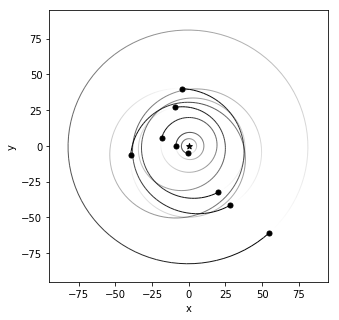

In [9]:
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.units = ('yr', 'AU', 'Msun')
a_neptune = 30.05

tmax = 1e5
n_comets = 5

try:
     sim = rebound.Simulation.from_file("solarsystem.bin")
except:
     sim.add('sun')
     sim.add('jupiter')
     sim.add('saturn')
     sim.add('uranus')
     sim.add('neptune')
     sim.save("solarsystem.bin")


rebx = reboundx.Extras(sim)
rebx.add("modify_orbits_forces")
sim.particles[4].params["tau_a"] = 1e5

a = np.random.uniform(low = 10., high = 45. , size = n_comets)

for i in xrange(0,n_comets):
     rand = np.random.random()*2*np.pi
     sim.add( a=a[i], e=0.15, inc=0., Omega=0, omega=rand, f=rand )
     sim.particles[-1].params["CO/CO2"] = chemratio(a[i])
sim.exit_max_distance=1e6


sim.integrate(tmax)
sim.move_to_com()


orbits = sim.calculate_orbits()
for orbit in orbits:
     print(orbit)


fig = rebound.OrbitPlot(sim)
sim.getWidget(size=(500,300),scale=1.8*a_neptune)